In [3]:
import numpy as np
import pandas as pd
from openbb import obb

In [4]:
sectors = [
    "XLE",
    "XLF",
    "XLU",
    "XLI",
    "GDX",
    "XLV",
    "XLY",
    "XLP",
    "XLB",
    "XOP",
    "IYR",
    "XHB",
    "ITB",
    "VNQ",
    "GDXJ",
    "IYE",
    "OIH",
    "XME",
    "XRT",
    "IBB",
    "SMH",
    "KBE",
    "KRE",
    "XTL",
]

data = obb.equity.price.historical(
    sectors,
    start_date="2022-01-01",
    provider="yfinance"
).to_df()
data

,open,high,low,close,volume,split_ratio,dividend,symbol
date,,,,,,,,
2022-01-03,31.420000,31.530001,31.209999,31.250000,18828900,0.0,0.0,GDX
2022-01-03,41.270000,41.490002,40.950001,41.029999,6289900,0.0,0.0,GDXJ
2022-01-03,152.309998,152.490005,149.339996,152.369995,3753900,0.0,0.0,IBB
2022-01-03,83.040001,83.040001,80.199997,80.690002,3179600,0.0,0.0,ITB
2022-01-03,30.120001,31.020000,30.120001,31.000000,3693600,0.0,0.0,IYE
...,...,...,...,...,...,...,...,...
2024-12-20,231.759995,227.610001,225.720001,227.160004,283082,0.0,0.0,XLY
2024-12-20,58.000000,57.279999,56.470001,57.150002,130284,0.0,0.0,XME
2024-12-20,129.190002,126.135002,124.529999,126.129997,204122,0.0,0.0,XOP


In [7]:
data["returns"] = data.groupby("symbol").close.pct_change()

portfolio_stats = data.groupby("symbol").agg(
    daily_returns=("returns", "mean"),
)

portfolio_stats["weights"] = 1 / len(sectors)

covariance_matrix = (
    data
    .pivot(
        columns="symbol",
        values="returns"
    )
    .dropna()
    .cov()
)
covariance_matrix

symbol,GDX,GDXJ,IBB,ITB,IYE,IYR,KBE,KRE,OIH,SMH,...,XLF,XLI,XLP,XLU,XLV,XLY,XME,XOP,XRT,XTL
symbol,,,,,,,,,,,,,,,,,,,,,
GDX,0.000473,0.000527,0.000100,0.000129,0.000123,0.000114,0.000062,0.000055,0.000168,0.000132,...,0.000061,0.000075,0.000055,0.000096,0.000059,0.000099,0.000264,0.000152,0.000106,0.000100
GDXJ,0.000527,0.000613,0.000122,0.000157,0.000153,0.000133,0.000088,0.000081,0.000212,0.000172,...,0.000080,0.000097,0.000062,0.000106,0.000068,0.000128,0.000321,0.000194,0.000137,0.000129
IBB,0.000100,0.000122,0.000192,0.000165,0.000063,0.000115,0.000132,0.000135,0.000086,0.000173,...,0.000099,0.000097,0.000055,0.000065,0.000094,0.000148,0.000136,0.000090,0.000167,0.000140
ITB,0.000129,0.000157,0.000165,0.000365,0.000081,0.000173,0.000196,0.000200,0.000109,0.000241,...,0.000134,0.000147,0.000074,0.000091,0.000094,0.000212,0.000192,0.000119,0.000260,0.000180
IYE,0.000123,0.000153,0.000063,0.000081,0.000274,0.000072,0.000129,0.000132,0.000343,0.000097,...,0.000094,0.000090,0.000034,0.000057,0.000045,0.000078,0.000209,0.000326,0.000101,0.000093
IYR,0.000114,0.000133,0.000115,0.000173,0.000072,0.000170,0.000138,0.000143,0.000090,0.000132,...,0.000101,0.000101,0.000067,0.000103,0.000077,0.000131,0.000136,0.000096,0.000148,0.000131
KBE,0.000062,0.000088,0.000132,0.000196,0.000129,0.000138,0.000334,0.000367,0.000195,0.000186,...,0.000183,0.000143,0.000058,0.000073,0.000075,0.000173,0.000210,0.000175,0.000224,0.000175
KRE,0.000055,0.000081,0.000135,0.000200,0.000132,0.000143,0.000367,0.000409,0.000203,0.000186,...,0.000190,0.000148,0.000059,0.000074,0.000075,0.000176,0.000218,0.000182,0.000235,0.000183
OIH,0.000168,0.000212,0.000086,0.000109,0.000343,0.000090,0.000195,0.000203,0.000537,0.000149,...,0.000130,0.000128,0.000036,0.000063,0.000053,0.000109,0.000299,0.000422,0.000145,0.000131


In [8]:
simulations = 100
days = len(data.index.unique())
initial_captial = 100_000

portfolio = np.zeros((days, simulations))

historical_returns = np.full(
    shape=(days, len(sectors)),
    fill_value=portfolio_stats.daily_returns
)

In [10]:
L = np.linalg.cholesky(covariance_matrix)

for i in range(0, simulations):
    Z = np.random.normal(size=(days, len(sectors)))
    daily_returns = historical_returns + np.dot(L, Z.T).T
    portfolio[:, i] = (
        np.cumprod(np.dot(daily_returns, portfolio_stats.weights) + 1) * initial_captial
    )

simulated_portfolio = pd.DataFrame(portfolio)

In [11]:
alpha = 5

# monte carlo var
def montecarlo_var(alpha):
    sim_val = simulated_portfolio.iloc[-1, :]
    return np.percentile(sim_val, alpha)

def conditional_var(alpha):
    sim_val = simulated_portfolio.iloc[-1, :]
    return sim_val[sim_val <= montecarlo_var(alpha)].mean()

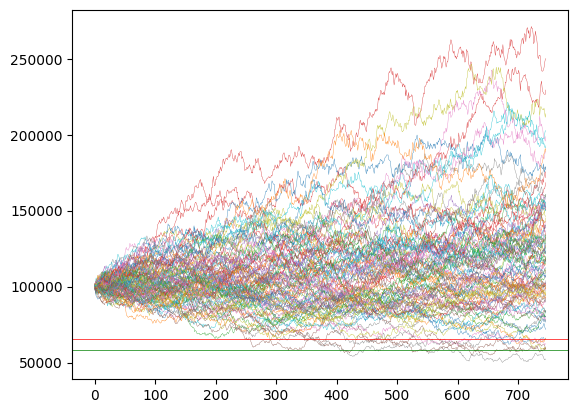

In [12]:
mc_var = montecarlo_var(alpha)
cond_var = conditional_var(alpha)

ax = simulated_portfolio.plot(lw=0.25, legend=False)
ax.axhline(mc_var, lw=0.5, c="r")
ax.axhline(cond_var, lw=0.5, c="g")